In [1]:
%pylab inline
%matplotlib notebook

rcParams["figure.figsize"]=12,8

# circles can draw balls in data units, this way, balls touch each other on the plot (from stackoverflow)
# deposit_particles if the simulation function that calculates the center coordinated of deposited particles
# create_envelope calculates the surface of the forst n particles from x,y, given r
from functions import circles,deposit_particles,create_envelope#,timeline_plot

# interactions
from ipywidgets import interact
from ipywidgets.widgets import IntSlider,IntText,Label,VBox,HBox,Layout,Button,FloatSlider,ToggleButton,FloatText
from IPython.display import clear_output,display

/home/eeszben/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# how to update widgets based on previous widgets?

In [14]:
def timeline_plot(x,y,n,r,height,length,annotated=False):
    """
    Creates a plot of the first n fallen particles calulated by the previous function.
    Can add particle number on the plot.
    x and y coordinates are global variables, they are not passed here.
    
    Inputs:
        - n: number of particles to plot
        - height: height of the plot (simulation units)
        - length: width of the plot (simulation units)
        - annotation: switch partice numbering on/off
        - plot_envelope: switch envelope calculation/plotting on/off
    """
    
    from matplotlib.pyplot import cla,gca,title,annotate,plot,show,xlim,ylim,figure
    
    cla()
    ax=gca()
    title("Ballistic deposition")
    circles(x[0:n],y[0:n],r,alpha=0.5)
    if annotated:
        for e in range(n):
            annotate(str(e),(x[e],y[e]),hjust=0.5,vjust=0.5)
    #plot(np.linspace(0,L,100),tan(theta)*np.linspace(0,L,100)+100)
    ax.set_aspect('equal')
    ax.autoscale(tight=True)
    xlim(0,length)
    ylim(0,height)
    return ax

def plot_envelope(x,y,n,r,L,height,sampling_factor=100):
    
    from numpy import isnan
    from matplotlib.pyplot import plot,xlim,ylim
    
    xe,ye=create_envelope(x,y,n,r,L,sampling_factor=100)
    ye[isnan(ye)]=0
    ax.plot(xe,ye,'k-',lw=3)
    ax.set_aspect('equal')
    ax.autoscale(tight=True)

In [15]:
def display_sim_widgets():
    
    global theta_select_widget,N_select_widget,L_select_widget,r_select_widget,layout_inttexts,layout_labels,layout_run_button
    
    # parameters of the simulation
    layout_labels=Layout(width='200px')
    layout_inttexts=Layout(width='200px')

    theta_select_label=Label(value=r'Incident angle $\theta$',layout=layout_labels)
    theta_select_widget=FloatSlider(value=40.0,min=0.0,max=180.0,step=10.0)

    N_select_label=Label(value="Number of particles:",layout=layout_labels)
    N_select_widget=IntText(value=5000,layout=layout_inttexts)

    L_select_label=Label(value="Length of deposition:",layout=layout_labels)
    L_select_widget=IntText(value=100,layout=layout_inttexts)

    r_select_label=Label(value="Size of particles",layout=layout_labels)
    r_select_widget=FloatText(value=0.1,layout=layout_inttexts)

    layout_run_button=Layout(width='150px')
    run_button=Button(description="Deposit particles!",layout=layout_run_button)

    def call_deposit_particles(handler):
        global x,y
        x,y=deposit_particles(
            theta_select_widget.value,
            N_select_widget.value,
            L_select_widget.value,
            r_select_widget.value
        )

    run_button.on_displayed(call_deposit_particles)
    run_button.on_click(call_deposit_particles)

    display(VBox([\
        HBox([theta_select_label,theta_select_widget]),\
        HBox([N_select_label,N_select_widget]),\
        HBox([L_select_label,L_select_widget]),\
        HBox([r_select_label,r_select_widget]),\
        run_button\
        ]))

In [16]:
display_sim_widgets()

100%|██████████| 5000/5000 [00:06<00:00, 739.56it/s] 


In [17]:
def display_plot_widgets():
    # controlling plot variables
    stepsize_label=Label(value="Stepsize: ",layout=Layout(width='100px'))
    stepsize_widget=IntText(value=10,layout=Layout(width='50px'))

    num_particles_label=Label(value="Number of particles fallen:",layout=layout_labels)
    num_particles_widget=IntSlider(value=0,min=0,max=N_select_widget.value,step=stepsize_widget.value)

    annotated_label=Label(value="Annotate particles?:",layout=layout_labels)
    annotated_widget=ToggleButton(value=False,description="Yes")

    envelope_label=Label(value="Plot envelope?:",layout=layout_labels)
    envelope_widget=ToggleButton(value=False,description="Yes")

    fig_height_label=Label(value="Figure height (in particle sizes):",layout=layout_labels)
    fig_height_widget=IntText(value=50)

    def call_num_particle_change(handler):
        ax=timeline_plot(x,y,num_particles_widget.value,r_select_widget.value,
                      height=fig_height_widget.value*r_select_widget.value,
                      length=L_select_widget.value,
                      annotated=annotated_widget.value)
        if envelope_widget.value:
            plot_envelope(x,y,N_select_widget.value,r_select_widget.value,L_select_widget.value,fig_height_widget.value)
        show()

    num_particles_widget.observe(call_num_particle_change)
    annotated_widget.observe(call_num_particle_change)
    envelope_widget.observe(call_num_particle_change)

    display(VBox([\
        HBox([num_particles_label,num_particles_widget,stepsize_label,stepsize_widget]),\
        HBox([fig_height_label,fig_height_widget]),\
        HBox([annotated_label,annotated_widget]),\
        HBox([envelope_label,envelope_widget])\
    ]))
    
    figure(figsize=(12,8))

<IPython.core.display.Javascript object>


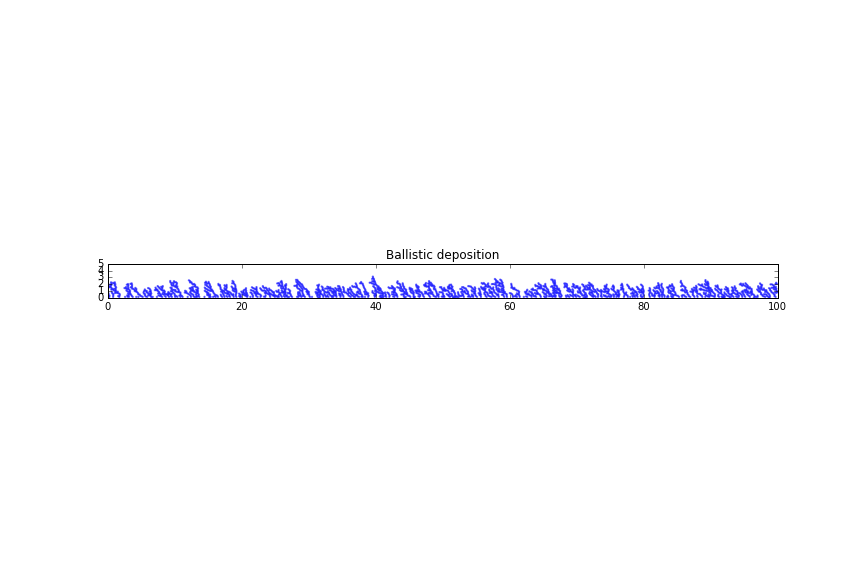

In [18]:
display_plot_widgets()

Several angles, several lengths, storing deposition results in a picke file.

In [ ]:
res={}
for theta in [40,60,70,80,90]:
    print "theta",theta
    res[theta]={}
    for L in [20,50,100,200,500]:
        print ("L",L)
        x,y=deposit_particles(70,10000,300,1)
        res[theta][L]={"x":x,"y":y}

In [20]:
import pickle

f=open("deposition_results.picklestring","w")
f.write(pickle.dumps(res))
f.close()

In [40]:
h=[]
w=[]
xel=[]
yel=[]
for n in trange(1,10000,100):
    xe,ye=create_envelope(x,y,n,r=1,L=300.0)
    h.append(mean(ye[20:][:-20]))
    w.append(std(ye[20:][:-20]))
    xel.append(xe[20:][:-20])
    yel.append(ye[20:][:-20])

100%|██████████| 100/100 [04:09<00:00,  4.79s/it]


This is a test example to show how a surface evolves.

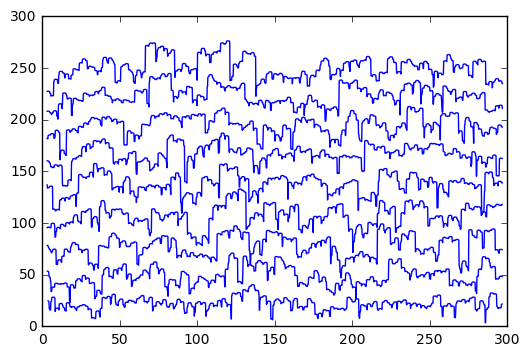

In [37]:
figure()
for i in range(10):
    plot(xel[i],yel[i],"b-")

This is a test example of log(w),log(h) plot. Does not look like in the slides.

[]

/home/bokanyie/anaconda3/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


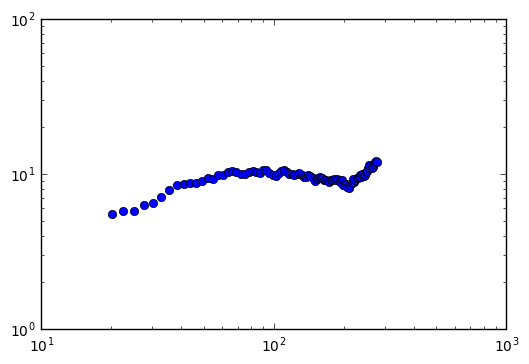

In [42]:
plot(h,w,'bo')
loglog()

In [ ]:
# data collapse should be there